
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load data in dataframe
df = pd.read_csv('train.csv')

In [61]:
#Find the average age of those who survived and those who did not
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Survived,,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424,0.010929
1,444.358824,1.955882,28.193299,0.476471,0.467647,48.209498,0.944118,0.000000



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
x = df.columns.values.tolist()
y = df.isnull().sum().tolist()

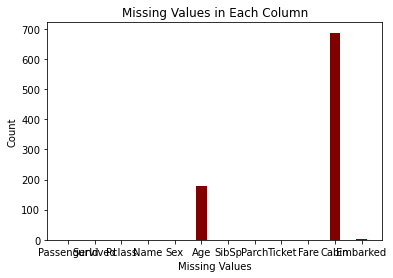

In [7]:
plt.bar(x, y, color ='maroon', width = 0.4)

plt.xlabel("Missing Values")
plt.ylabel("Count")
plt.title("Missing Values in Each Column")
plt.show()

In [8]:
df.drop(df[df.Embarked.isnull()].index, inplace=True)

In [9]:
df.Cabin = df.Cabin.fillna('¯\(ツ)/¯')

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [10]:
df['FamilyCount'] = df.SibSp + df.Parch

In [11]:
test_isreverend = lambda x: 1 if ('Rev.' in x) else 0
df['IsReverend'] = df.Name.apply(test_isreverend)

In [12]:
df.join(pd.get_dummies(df.Embarked, prefix='Embarked'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


In [13]:
df.join(pd.get_dummies(df.Sex, prefix='Sex'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,0,1


In [14]:
def checkname(text):
    if 'Mr.' in text:
        return 'Mr'
    elif 'Mrs.' in text:
        return 'Mrs'
    elif 'Miss.'in text:
        return 'Miss'
    elif 'Dr.'in text:
        return 'Dr'
    elif 'Sir.'in text:
        return 'Sir'
    elif 'Mdm.'in text:
        return 'Mdm'
    elif 'Rev.'in text:
        return 'Rev'
    else:
        return None

In [15]:
df['Title'] = df.Name.apply(checkname)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,Mr


In [17]:
df.Title.value_counts()

Mr      517
Miss    181
Mrs     124
Dr        7
Rev       6
Sir       1
Name: Title, dtype: int64

In [18]:
#Your code here 

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [81]:
df.Survived.mean()
# (1) 38.2%

0.38245219347581555

In [43]:
df.groupby(['Sex']).mean()
# (2) Female fared better  at 74%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Sex,,,,,,,,,
female,430.932692,0.740385,2.166667,27.745174,0.698718,0.653846,44.252124,1.352564,0.000000
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.665511,0.010399


In [51]:
df.groupby(['Pclass']).mean()
# (3) 1 = 63%, 2 = 47%, 3 = 24%

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Pclass,,,,,,,,
1,461.742991,0.626168,38.105543,0.420561,0.359813,84.193516,0.780374,0.000000
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.782609,0.032609
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,1.008147,0.000000


In [52]:
df.groupby(['IsReverend']).mean()
# (4) Reverends all died

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount
IsReverend,,,,,,,,
0,445.730464,0.385051,2.313703,29.527153,0.526614,0.383918,32.190345,0.910532
1,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.333333


In [53]:
df.groupby(['Cabin']).mean()
# (5) 30%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Cabin,,,,,,,,,
A10,584.000000,0.000000,1.00000,36.000000,0.000000,0.000000,40.125000,0.000000,0.000000
A14,476.000000,0.000000,1.00000,NaN,0.000000,0.000000,52.000000,0.000000,0.000000
A16,557.000000,1.000000,1.00000,48.000000,1.000000,0.000000,39.600000,1.000000,0.000000
A19,285.000000,0.000000,1.00000,NaN,0.000000,0.000000,26.000000,0.000000,0.000000
A20,600.000000,1.000000,1.00000,49.000000,1.000000,0.000000,56.929200,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
F38,777.000000,0.000000,3.00000,NaN,0.000000,0.000000,7.750000,0.000000,0.000000
F4,401.500000,1.000000,2.00000,2.500000,2.000000,1.000000,39.000000,3.000000,0.000000
G6,216.000000,0.500000,3.00000,14.750000,0.500000,1.250000,13.581250,1.750000,0.000000


In [84]:
df[df.Age.isnull()].Survived.mean()
# (6) 29.3%

0.2937853107344633

In [85]:
df.groupby(['Embarked']).mean()
# (7) C,Q,S = 55%, 39%, 34% respectively

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Embarked,,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.750000,0.000000
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.597403,0.012987
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.984472,0.007764


In [87]:
df[df.Age < 12].groupby(['Pclass']).mean()
# (8) 1, 2, 3 = 75%, 100%, 40% respectively

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
Pclass,,,,,,,,
1,463.250000,0.750000,4.480000,0.750000,2.000000,126.239575,2.750000,0.0
2,451.235294,1.000000,3.490000,0.823529,1.352941,28.740200,2.176471,0.0
3,429.531915,0.404255,5.104681,2.361702,1.404255,24.919679,3.765957,0.0


In [98]:
df.loc[df.Name.str.contains("Cap")]
# (9) Captain died

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,None


In [101]:
df[df.Survived == 0]['Fare'].max()
#263


263.0

In [118]:
df.loc[(df.Survived == 0) & (df.Fare == 263)]
# (10) Fortune, Charles Alexander and Mark, 263

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,Mr
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,Mr


In [128]:
print(df[df.FamilyCount == 0].Survived.mean())
print(df[df.FamilyCount >0].Survived.mean())
# Have family members has a higher chance of survival

0.30093457943925234
0.5056497175141242


In [ ]:
#Your code here 

In [ ]:
#Your code here 

In [ ]:
#Your code here 

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


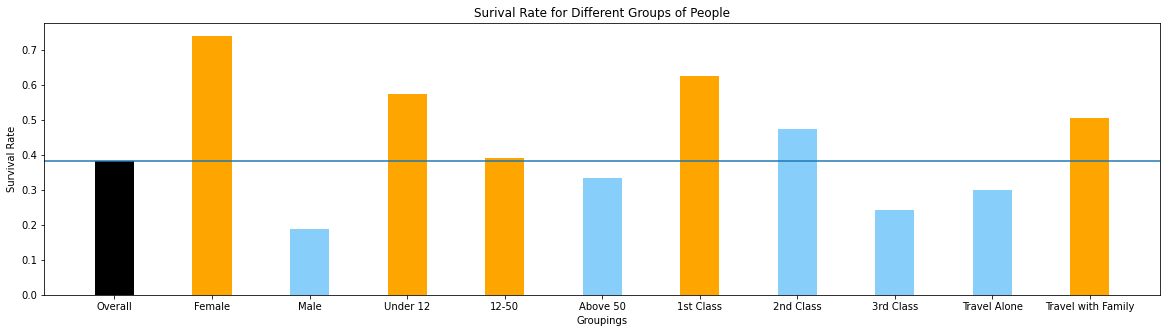

In [205]:
#Age
group = []
values = []
colors = []

group.append('Overall')
values.append(df.Survived.mean())
colors.append('Black')

group.append('Female')
values.append(df[df.Sex == 'female'].Survived.mean())
colors.append('orange')

group.append('Male')
values.append(df[df.Sex == 'male'].Survived.mean())
colors.append('lightskyblue')

group.append('Under 12')
values.append(df[df.Age < 12].Survived.mean())
colors.append('orange')

group.append('12-50')
values.append(df[(df.Age > 11) & (df.Age < 50)].Survived.mean())
colors.append('orange')

group.append('Above 50')
values.append(df[df.Age > 50].Survived.mean())
colors.append('lightskyblue')

group.append('1st Class')
values.append(df[df.Pclass == 1].Survived.mean())
colors.append('orange')

group.append('2nd Class')
values.append(df[df.Pclass == 2].Survived.mean())
colors.append('lightskyblue')

group.append('3rd Class')
values.append(df[df.Pclass == 3].Survived.mean())
colors.append('lightskyblue')

group.append('Travel Alone')
values.append(df[df.FamilyCount == 0].Survived.mean())
colors.append('lightskyblue')

group.append('Travel with Family')
values.append(df[df.FamilyCount > 0].Survived.mean())
colors.append('orange')



fig = plt.figure(figsize = (20, 5))
 
plt.bar(group, values, color = colors, width = 0.4)

plt.xlabel("Groupings")
plt.ylabel("Survival Rate")
plt.title("Surival Rate for Different Groups of People")
plt.axhline(y=df.Survived.mean())

plt.show()

In [ ]:
#Your code here 

In [ ]:
#Your code here 

In [ ]:
#Your code here 